<a href="https://colab.research.google.com/github/sarahwierzbicki/projects/blob/main/Flower_Recognition_using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile
import numpy as np
import pandas as pd
import keras
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [ ]:
!unzip archive.zip

Archive:  archive.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
replace flowers/daisy/10140303196_b88d3d6cec.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inf

In [ ]:
base_dir = '/content/flowers'

step 1: data preprocessing

In [ ]:
X=[]
Z=[]
IMG_SIZE = 150
BATCH_SIZE = 32
FLOWER_DAISY_DIR = '/content/flowers/daisy'
FLOWER_SUN_DIR = '/content/flowers/sunflower'
FLOWER_TULIP_DIR = '/content/flowers/tulip'
FLOWER_DANDI_DIR = '/content/flowers/dandelion'
FLOWER_ROSE_DIR = '/content/flowers/rose'

In [ ]:
def assign_label(img, flower_type):
  return flower_type

In [ ]:
def make_train_data(flower_type, DIR):
  for img in tqdm(os.listdir(DIR)):
    label = assign_label(img, flower_type)
    path = os.path.join(DIR,img)
    img = cv2.imread(path,cv2.IMREAD_COLOR)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    X.append(np.array(img))
    Z.append(str(label))

In [ ]:
make_train_data('Rose', FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 784/784 [00:00<00:00, 895.34it/s]

784


In [ ]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 764/764 [00:00<00:00, 918.34it/s]

1548


In [ ]:
make_train_data('Sunflower',FLOWER_SUN_DIR)
print(len(X))

100%|██████████| 733/733 [00:01<00:00, 689.87it/s]

2281


In [ ]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 984/984 [00:01<00:00, 810.82it/s]

3265


In [ ]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 1052/1052 [00:01<00:00, 885.56it/s]

4317


In [ ]:
classes = os.listdir(base_dir)
classes

['sunflower', 'dandelion', 'rose', 'tulip', 'daisy']

In [ ]:
le = LabelEncoder()
Y = le.fit_transform(Z)
Y = to_categorical(Y, 5)
X = np.array(X)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 42)

In [ ]:
#training and test sets
x_train.shape

(3237, 150, 150, 3)

In [ ]:
y_train.shape

(3237, 5)

In [ ]:
x_test.shape

(1080, 150, 150, 3)

In [ ]:
y_test.shape

(1080, 5)

step 2: using inception model

In [ ]:
import random as rn

step 3: transfer learning in tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

In [ ]:
#layers libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [ ]:
base_model = tf.keras.applications.InceptionResNetV2(include_top=False, weights ='imagenet', input_shape = (150,150,3))

In [ ]:
base_model.trainable=False

In [ ]:
inputs = tf.keras.Input(shape=(150,150,3))

scaling = keras.layers.Rescaling(scale=1/127.5, offset=-1)
x = scaling(inputs)
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(5)(x)
model = keras.Model(inputs, outputs)
model.summary(show_trainable=True)

Model: "functional_84"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_42 (InputLayer) │ (None, 150, 150, 3)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ rescaling_3 (Rescaling)     │ (None, 150, 150, 3)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ inception_resnet_v2         │ (None, 3, 3, 1536)    │ 54,336,736 │   N   │
│ (Functional)                │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ global_average_pooling2d_2  │ (None, 1536)          │          0 │   -   │
│ (GlobalAveragePooling2D)    │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dropout_12 (Dropout)        │ (None, 1536)          │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_33 (Dense)            │ (None, 5)             │      7,685 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 54,344,421 (207.31 MB)

 Trainable params: 7,685 (30.02 KB)

 Non-trainable params: 54,336,736 (207.28 MB)

In [ ]:
#train top layer
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='categorical_crossentropy', metrics=['accuracy'],
)

In [ ]:
history = model.fit(x = x_train, y = y_train, verbose = 1, epochs = 10, batch_size = 32, validation_split=0.2)

Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 56s 365ms/step - accuracy: 0.2603 - loss: 7.0146 - val_accuracy: 0.1620 - val_loss: 9.3408
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.1497 - loss: 9.0679 - val_accuracy: 0.0910 - val_loss: 9.3010
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.1469 - loss: 7.7140 - val_accuracy: 0.1574 - val_loss: 7.9099
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.1888 - loss: 7.8988 - val_accuracy: 0.1574 - val_loss: 7.8850
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.1920 - loss: 8.3542 - val_accuracy: 0.1574 - val_loss: 8.5565
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.1825 - loss: 8.2415 - val_accuracy: 0.1590 - val_loss: 9.0042
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.1909 - loss: 8.3305

KeyboardInterrupt: 

In [ ]:
input_tensor = tf.keras.Input(shape=(150,150,3))
output_tensor = base_model(input_tensor)
scaling = keras.layers.Rescaling(scale=1/127.5, offset=-1)

In [ ]:
model = Sequential()
model.add(base_model)
model.add(scaling)
model.add(Flatten())
model.add(BatchNormalization())

model.add(Dense(5, activation='softmax'))
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_resnet_v2             │ (None, 3, 3, 1536)     │    54,336,736 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 3, 3, 1536)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 13824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1845        │ (None, 13824)          │        55,296 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 5)              │        69,125 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,461,157 (207.75 MB)

 Trainable params: 96,773 (378.02 KB)

 Non-trainable params: 54,364,384 (207.38 MB)

In [ ]:
history = model.fit(x = x_train, y = y_train, verbose = 1, epochs = 10, batch_size = 32, validation_split=0.2)

Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 54s 367ms/step - accuracy: 0.2625 - loss: 3.4515 - val_accuracy: 0.1528 - val_loss: 3.8063
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.2550 - loss: 2.6193 - val_accuracy: 0.1667 - val_loss: 2.8569
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.3016 - loss: 2.1378 - val_accuracy: 0.2670 - val_loss: 2.4945
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.2896 - loss: 2.4159 - val_accuracy: 0.3071 - val_loss: 2.0955
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.3528 - loss: 2.0650 - val_accuracy: 0.2778 - val_loss: 2.0512
Epoch 6/10
32/81 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.3744 - loss: 1.7805

KeyboardInterrupt: 

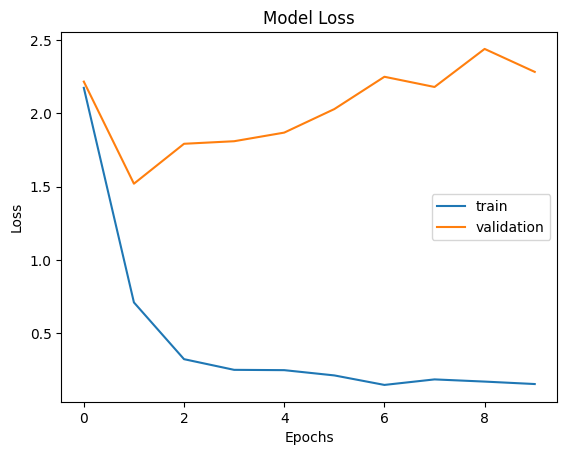

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

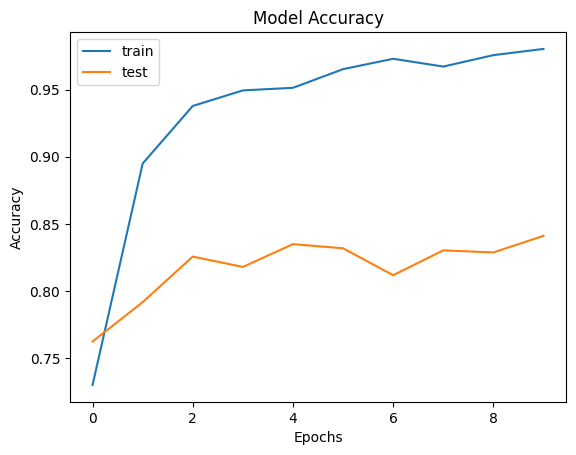

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
model.save('inception_flower.keras')

confusion matrix

In [ ]:
y_pred = model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 22s 368ms/step


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix, classification_report

In [ ]:
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

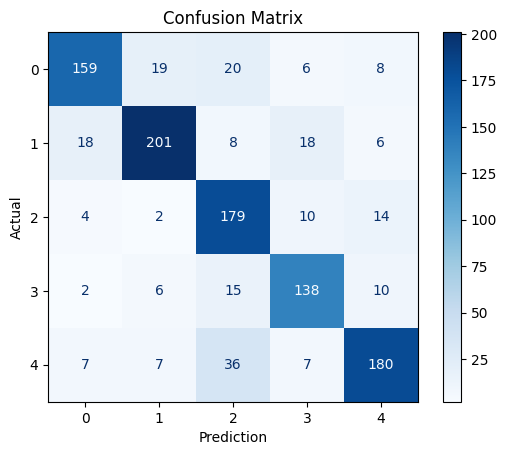

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.show()

In [ ]:
report = classification_report(y_test, y_pred,
                               output_dict=True,
                               target_names=classes)
report_df = pd.DataFrame(report).transpose()

In [ ]:
pd.set_option("display.max_rows", None)
report_df.head(134)

,precision,recall,f1-score,support
sunflower,0.836842,0.750000,0.791045,212.000000
dandelion,0.855319,0.800797,0.827160,251.000000
rose,0.693798,0.856459,0.766595,209.000000
tulip,0.770950,0.807018,0.788571,171.000000
daisy,0.825688,0.759494,0.791209,237.000000
accuracy,0.793519,0.793519,0.793519,0.793519
macro avg,0.796519,0.794753,0.792916,1080.000000
weighted avg,0.800574,0.793519,0.794351,1080.000000
